In [116]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from tqdm import tqdm
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pickle
import tensorflow as tf
import math
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns


In [117]:
df = pd.read_csv("../Data_Scrape/Dataset/updated_dataset.csv")

In [118]:
df.head()

sp_song_id  danceability  energy  key  loudness  mode  \
0  6edQfeOlqbGteYixpJl3Sm         0.857   0.602   10    -8.311     1   
1  5Oe7wHPL4hdEXeF4AOayCi         0.322   0.990    8    -1.785     1   
2  6i1uWZYWabNHq2wQnoca58         0.666   0.884    9    -5.243     0   
3  4BzBtS6PBreni5hNPo2hos         0.609   0.578    9    -7.081     1   
4  0GvhHQbWSnGltjl0je61dI         0.699   0.514    4   -12.610     1   

   speechiness  acousticness  instrumentalness  liveness  ...  lda_topic_11  \
0       0.0290      0.489000           0.02440    0.3170  ...           0.0   
1       0.1710      0.000044           0.41700    0.0366  ...           0.0   
2       0.0429      0.506000           0.00612    0.0408  ...           0.0   
3       0.0414      0.296000           0.00000    0.1500  ...           0.0   
4       0.0315      0.587000           0.02900    0.2200  ...           0.0   

   lda_topic_12  lda_topic_13  lda_topic_14  lda_topic_15  lda_topic_16  \
0      0.022993      0.000000      0.122078           0.0      0.000000   
1      0.000000      0.163142      0.022999           0.0      0.144614   
2      0.000000      0.000000      0.000000           0.0      0.000000   
3      0.000000      0.511716      0.084905           0.0      0.000000   
4      0.000000      0.000000      0.401954           0.0      0.000000   

   lda_topic_17  lda_topic_18  lda_topic_19  Playlists  
0      0.000000      0.081108      0.386042      [165]  
1      0.187207      0.000000      0.000000       [79]  
2      0.000000      0.000000      0.582131       [15]  
3      0.000000      0.115004      0.108140      [168]  
4      0.000000      0.000000      0.000000  [30, 133]  

[5 rows x 36 columns]

In [119]:
dataset = []
data = np.array(df)
for i in df.index:
    l = eval(df["Playlists"][i])
#     if len(l) > 1:
#         continue
    data[i][-1] = str(l[0])
    dataset.append(data[i])
dataset = np.array(dataset)
        

In [120]:
print(len(df))
print(len(dataset))

11159
11159


In [121]:
# counts = []
# for i in range(169):
#     counts.append(0)
# for i in range(len(dataset)):
#     counts[int(dataset[i][-1])] += 1
# c = 0
# playlists_to_keep = set()
# for i in range(len(counts)):
#     if counts[i] >= 120:
#         c += 1
#         playlists_to_keep.add(str(i))        
# print(c)

In [122]:
# temp_dataset = []
# for c in dataset:
#     if str(c[-1]) in playlists_to_keep:
#         temp_dataset.append(c)
# dataset = temp_dataset
# dataset = np.array(dataset)
        

In [123]:
X = dataset[:, 1:-1]
y = dataset[:, -1]

In [124]:
# pca = PCA(n_components = 15)
# pca.fit(X)
# pca.explained_variance_

In [125]:
print(X.shape)
print(y.shape)
print(X[0])

(11159, 34)
(11159,)
[0.857 0.602 10 -8.311 1 0.028999999999999998 0.489 0.0244 0.317
 0.9570000000000001 105.15700000000001 239627 1999 48 0.0 0.0
 0.08313827961683272 0.0 0.0 0.0 0.0 0.0 0.0 0.2957790493965149 0.0 0.0
 0.022993091493844986 0.0 0.12207801640033722 0.0 0.0 0.0
 0.08110793679952621 0.3860418498516083]


2 0.5700045822806681


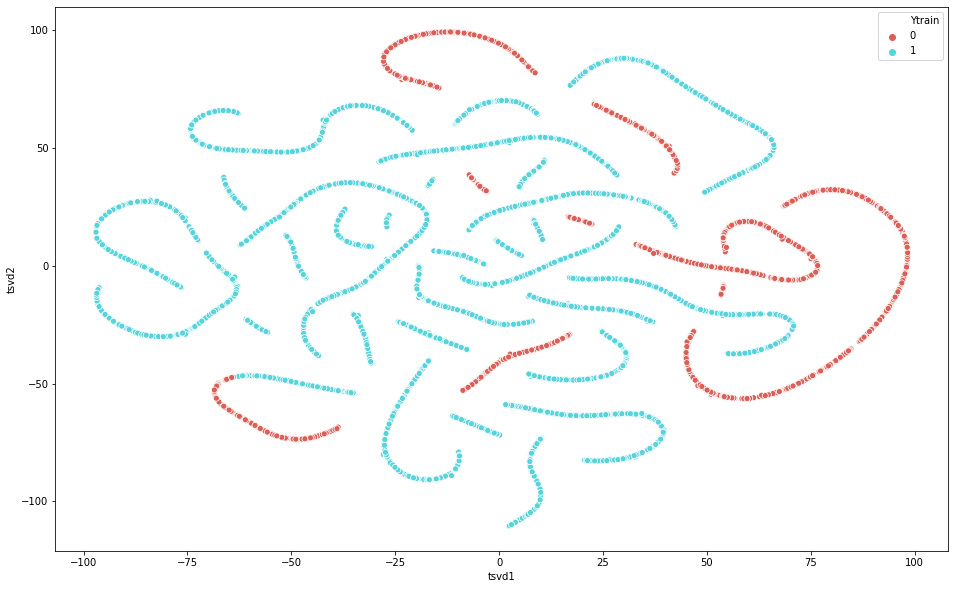

3 0.5419415715691344


KeyboardInterrupt: 

In [126]:
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    print(i, silhouette_score(X, kmeans.labels_, metric='euclidean')) 
    pred = kmeans.fit_predict(X)
    xx=TSNE(n_components = 2 )
    X_TSNE=xx.fit_transform(X)
    tsne_df = pd.DataFrame(columns = ['tsvd1','tsvd2','Ytrain'])
    tsne_df["tsvd1"]=X_TSNE[:,0]
    tsne_df["tsvd2"]=X_TSNE[:,1]
    tsne_df["Ytrain"]=pred
    # creating a dataframe of both dimensions of TSNE model and Ytrain to visualize plots

    # plotting our TSNE plot with labels on side
    plt.figure(figsize=(16,10))
    sns.scatterplot(x="tsvd1", y="tsvd2", hue="Ytrain",data=tsne_df,palette=sns.color_palette("hls", i),legend="full")
    plt.show()
    

For n_clusters = 2 The average silhouette_score is : 0.60993409786301
For n_clusters = 3 The average silhouette_score is : 0.5554506233909253
For n_clusters = 4 The average silhouette_score is : 0.5383156430302206
For n_clusters = 5 The average silhouette_score is : 0.5219971747496528
For n_clusters = 6 The average silhouette_score is : 0.5201717526959704
For n_clusters = 7 The average silhouette_score is : 0.5209050947047518
For n_clusters = 8 The average silhouette_score is : 0.5172948022238325
For n_clusters = 9 The average silhouette_score is : 0.5215090433031029
For n_clusters = 10 The average silhouette_score is : 0.5290030168156756


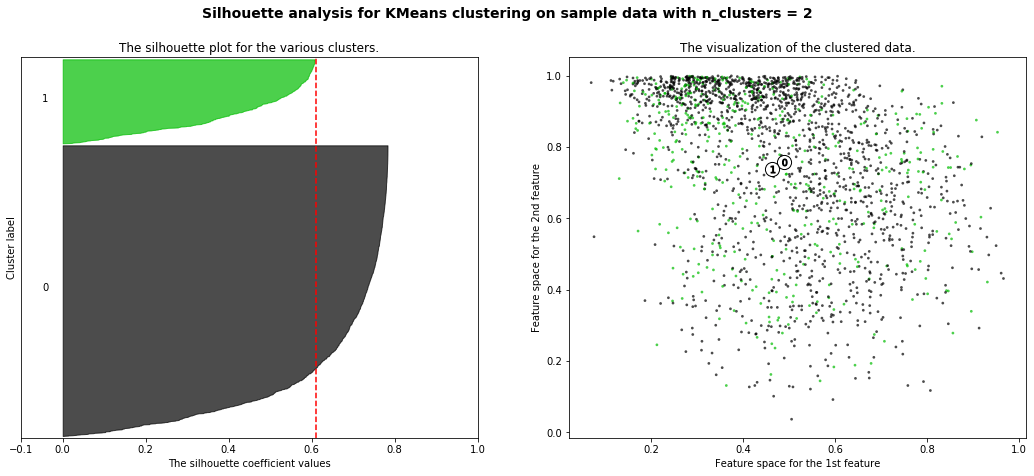

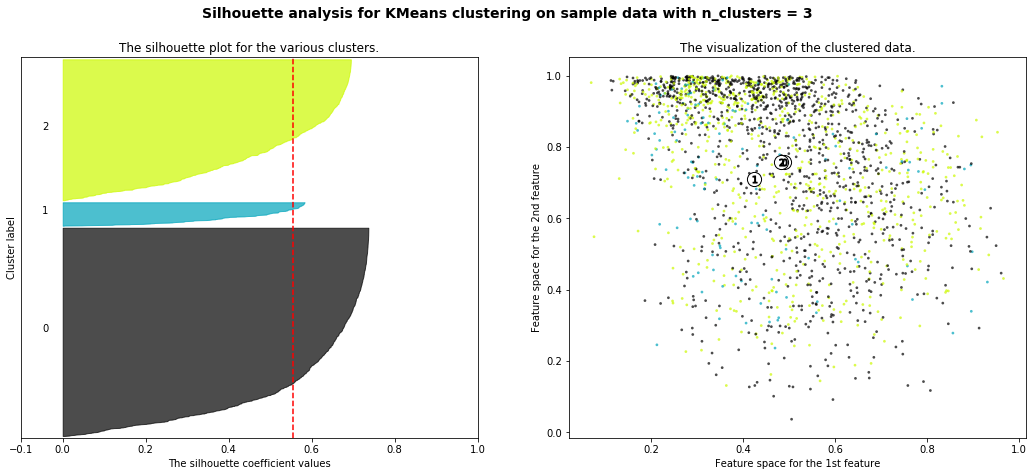

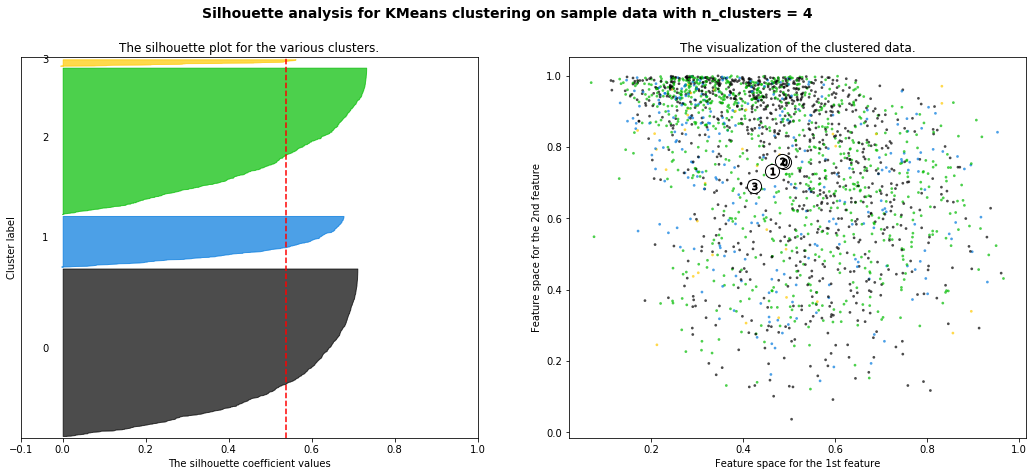

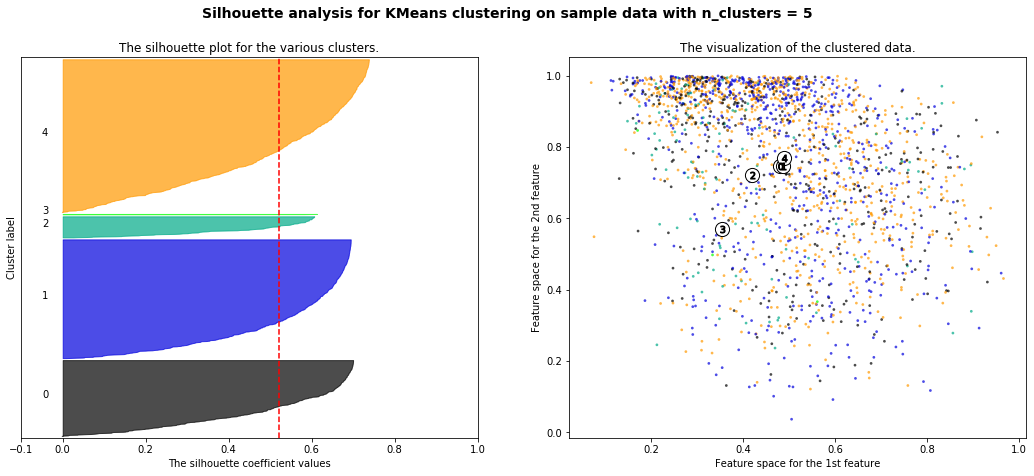

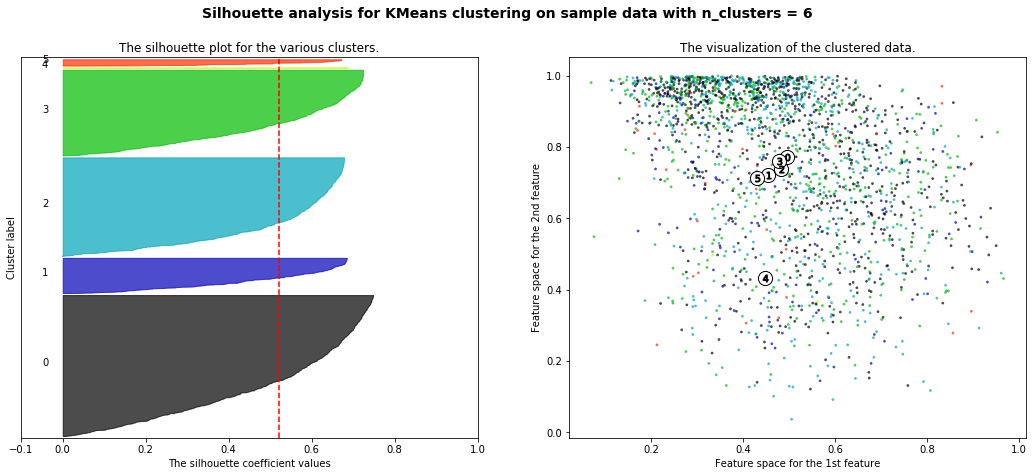

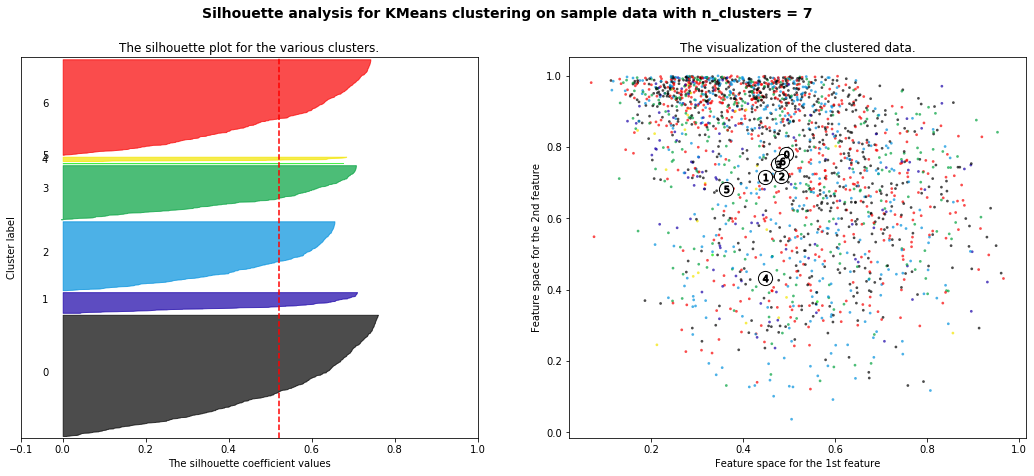

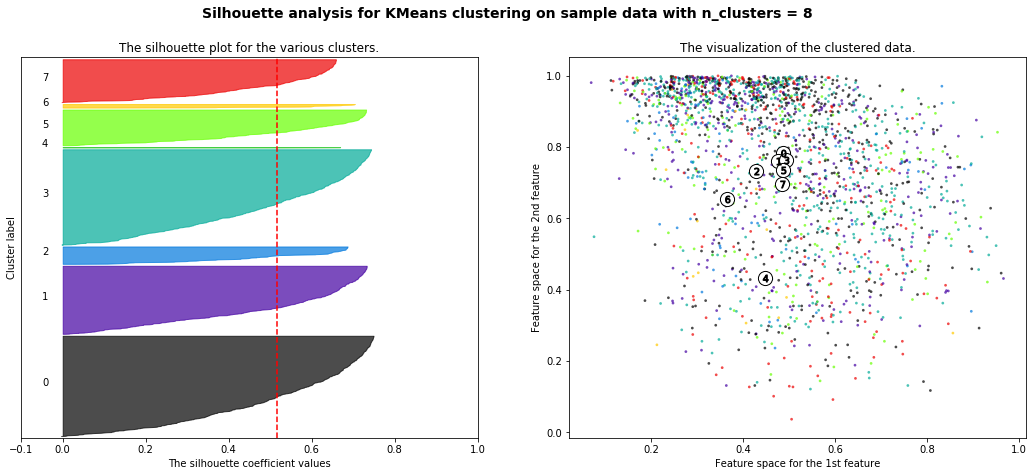

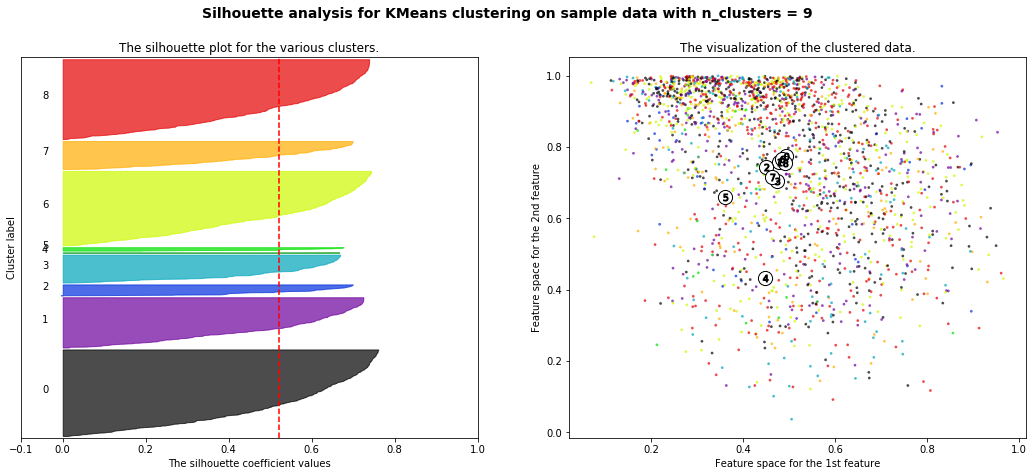

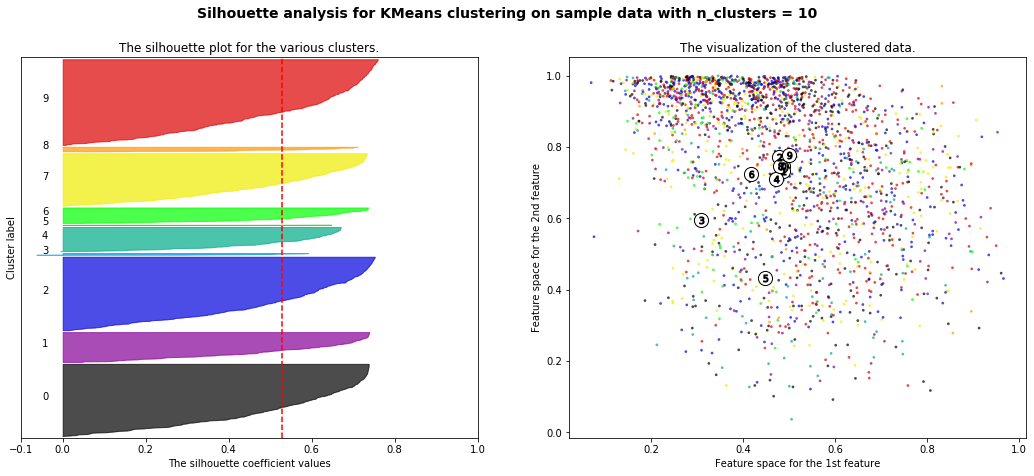

In [39]:
# for n_clusters in range(2,11):
#     # Create a subplot with 1 row and 2 columns
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)

#     # The 1st subplot is the silhouette plot
#     # The silhouette coefficient can range from -1, 1 but in this example all
#     # lie within [-0.1, 1]
#     ax1.set_xlim([-0.1, 1])
#     # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(X)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     print("For n_clusters =", n_clusters,
#           "The average silhouette_score is :", silhouette_avg)

#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(X, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = \
#             sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm.nipy_spectral(float(i) / n_clusters)
#         ax1.fill_betweenx(np.arange(y_lower, y_upper),
#                           0, ith_cluster_silhouette_values,
#                           facecolor=color, edgecolor=color, alpha=0.7)

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("The silhouette plot for the various clusters.")
#     ax1.set_xlabel("The silhouette coefficient values")
#     ax1.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax1.set_yticks([])  # Clear the yaxis labels / ticks
#     ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
#                   "with n_clusters = %d" % n_clusters),
#                  fontsize=14, fontweight='bold')

# plt.show()